In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Problem 02 - Fraud Check
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#### 1. Data Import

In [2]:
data_1 = pd.read_csv('Fraud_Check.csv')
data_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


#### B. Data Understanding

In [3]:
data_1.shape

(600, 6)

In [4]:
data_1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
data_1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
data_1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


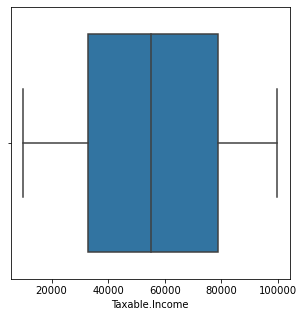

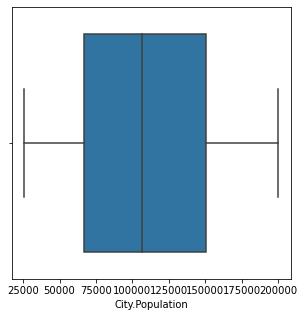

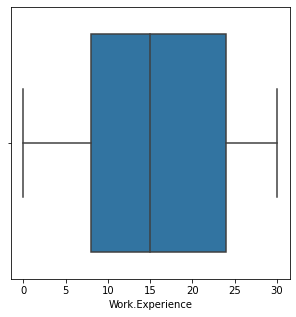

In [7]:
fig, a = plt.subplots(figsize=(5, 5))
a = sns.boxplot(data_1['Taxable.Income'])
fig, b = plt.subplots(figsize=(5, 5))
b = sns.boxplot(data_1['City.Population'])
fig, c = plt.subplots(figsize=(5, 5))
c = sns.boxplot(data_1['Work.Experience'])

In [8]:
data_1_corr = round(data_1.corr(),1)

<AxesSubplot:>

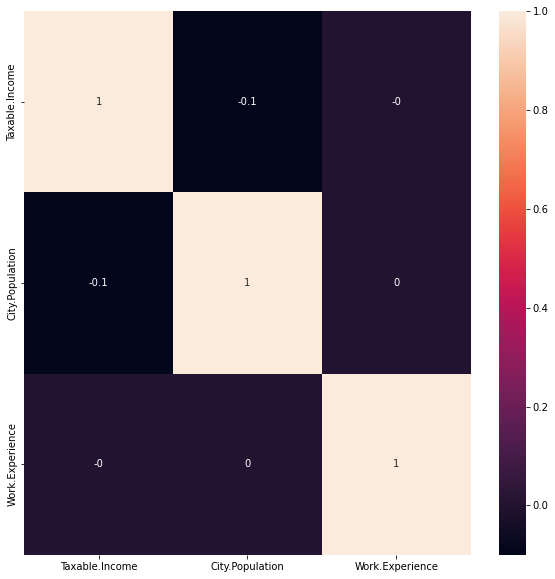

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data_1_corr,annot=True)

#### C. Data Prepation

In [10]:
data_1["Taxable Income"]="Risky"
data_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable Income
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Risky
596,YES,Divorced,69967,55369,2,YES,Risky
597,NO,Divorced,47334,154058,0,YES,Risky
598,YES,Married,98592,180083,17,NO,Risky


In [11]:
data_1.loc[data_1["Taxable.Income"]>30000,"Taxable Income"]="Good"
data_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [12]:
data_1['Taxable Income'].value_counts()

Good     476
Risky    124
Name: Taxable Income, dtype: int64

In [13]:
data_1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [14]:
data_1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
Taxable Income     object
dtype: object

In [15]:
data_1.drop(["Taxable.Income"],axis=1,inplace=True)

In [16]:
data_1 = pd.get_dummies(data_1, columns = ['Undergrad','Marital.Status','Urban'])
data_1

,City.Population,Work.Experience,Taxable Income,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,Good,1,0,0,0,1,0,1
1,134075,18,Good,0,1,1,0,0,0,1
2,160205,30,Good,1,0,0,1,0,0,1
3,193264,15,Good,0,1,0,0,1,0,1
4,27533,28,Good,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,Good,0,1,1,0,0,0,1
596,55369,2,Good,0,1,1,0,0,0,1
597,154058,0,Good,1,0,1,0,0,0,1
598,180083,17,Good,0,1,0,1,0,1,0


In [17]:
X = data_1.drop(labels='Taxable Income',axis=1)
y = data_1[['Taxable Income']]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=12,shuffle=True)

In [19]:
X_train.shape,y_train.shape

((480, 9), (480, 1))

In [20]:
X_train

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
281,167403,7,1,0,0,0,1,0,1
571,95421,7,1,0,0,0,1,0,1
543,130816,13,1,0,0,0,1,1,0
421,135185,13,0,1,0,0,1,1,0
85,125155,12,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
432,157217,11,1,0,0,1,0,0,1
259,197841,7,1,0,0,1,0,1,0
241,31377,18,0,1,0,0,1,0,1
253,77256,29,0,1,0,0,1,1,0


#### D.Model Building

#### 1. Random Forest

In [21]:
rf_classifier_1 = RandomForestClassifier()
rf_classifier_1.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
y_train_pred = rf_classifier_1.predict(X_train)

In [23]:
accuracy_score(y_train,y_train_pred)

1.0

In [24]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       369
       Risky       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [25]:
print(confusion_matrix(y_train,y_train_pred))

[[369   0]
 [  0 111]]


In [26]:
y_test_pred = rf_classifier_1.predict(X_test)

In [27]:
print(accuracy_score(y_test,y_test_pred))

0.7583333333333333


In [28]:
print('Classification Report:\n',classification_report(y_test,y_test_pred))

Classification Report:
               precision    recall  f1-score   support

        Good       0.88      0.85      0.86       107
       Risky       0.00      0.00      0.00        13

    accuracy                           0.76       120
   macro avg       0.44      0.43      0.43       120
weighted avg       0.78      0.76      0.77       120



In [29]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred))

Confusion Matrix:
 [[91 16]
 [13  0]]


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x29fbc4ac160>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x29fbc458f70>)

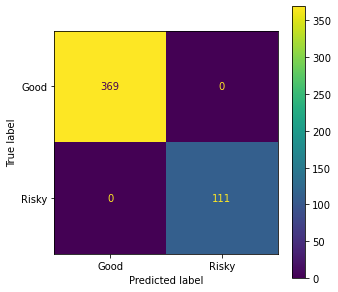

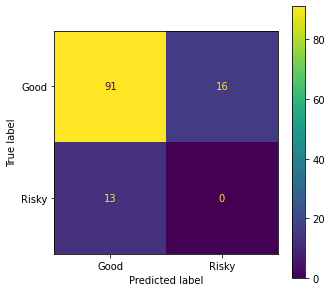

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf_classifier_1,X_train,y_train, ax = ax), plot_confusion_matrix(rf_classifier_1,X_test,y_test, ax = bx)

#### from above we can observe that training accuracy is 100% while test accuracy is 75.8 %. 
#### Model is clearly overfitted we can tackle this over fitting problem by using GridSearchCV.

#### 2. Graidient Boosting

In [31]:
gb_classifier_1 = GradientBoostingClassifier()
gb_classifier_1.fit(X_train,y_train)

GradientBoostingClassifier()

In [32]:
y_train_pred_gb = gb_classifier_1.predict(X_train)

In [33]:
accuracy_score(y_train,y_train_pred_gb)

0.8416666666666667

In [34]:
print(classification_report(y_train,y_train_pred_gb))

              precision    recall  f1-score   support

        Good       0.83      1.00      0.91       369
       Risky       1.00      0.32      0.48       111

    accuracy                           0.84       480
   macro avg       0.91      0.66      0.69       480
weighted avg       0.87      0.84      0.81       480



In [35]:
print(confusion_matrix(y_train,y_train_pred_gb))

[[369   0]
 [ 76  35]]


In [37]:
y_test_pred_gb = gb_classifier_1.predict(X_test)

In [42]:
accuracy_score(y_test,y_test_pred_gb)

0.7833333333333333

In [38]:
print('Classification Report:\n',classification_report(y_test,y_test_pred_gb))

Classification Report:
               precision    recall  f1-score   support

        Good       0.88      0.88      0.88       107
       Risky       0.00      0.00      0.00        13

    accuracy                           0.78       120
   macro avg       0.44      0.44      0.44       120
weighted avg       0.78      0.78      0.78       120



In [39]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred_gb))

Confusion Matrix:
 [[94 13]
 [13  0]]


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x29fbeba54f0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x29fbeba0970>)

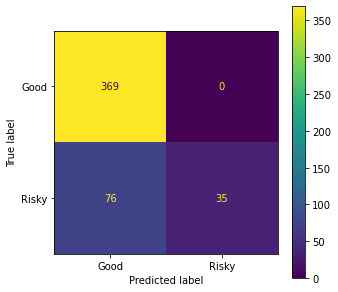

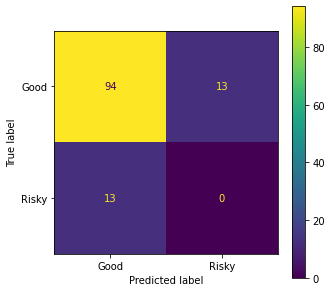

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(gb_classifier_1,X_train,y_train, ax = ax), plot_confusion_matrix(gb_classifier_1,X_test,y_test, ax = bx)

#### from above we can observe that training accuracy is 84% while test accuracy is 78 %. 
#### Model is clearly overfitted we can tackle this over fitting problem by using GridSearchCV.

### Conclusion